# 나머지 feature + 행정구역, 인구수

In [21]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [22]:
train = pd.read_csv("PJT002_train.csv", encoding = 'utf8')
test = pd.read_csv("PJT002_test.csv", encoding = 'utf-8')
validation = pd.read_csv("PJT002_validation.csv", encoding = 'utf8')

## 사용할 데이터

In [23]:
data = train[['emd_nm', 'hm_cnt','fr_sttn_dstnc', 'bldng_ar_prc', 'fr_wthr_fclt_dstnc', 'fr_mn_cnt', 'cctv_dstnc', 'cctv_in_100m', 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc', 'ahsm_dstnc','no_tbc_zn_dstnc','bldng_cnt_in_50m']]
data.head()

,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m
0,경상남도 창녕군 창녕읍,17360.0,4547,NaN,133,137.0,112,0,0,1891,29231,11322,88,0
1,경상남도 의령군 가례면,1791.0,6388,122581.0,489,85.0,818,0,0,4533,20480,3369,7727,0
2,경상남도 창녕군 창녕읍,17285.0,3340,618105.0,143,137.0,165,0,0,277,31197,12451,72,14
3,경상남도 창원시의창구 대산면,7327.0,179,719542.0,1585,176.0,131,0,0,438,4270,407,508,11
4,경상남도 창녕군 창녕읍,17278.0,4822,NaN,603,137.0,686,0,0,1702,29778,12487,707,0


## 도시와 시골 데이터로 분류

두 번째 어절의 끝에 따라 분류

- '시'로 끝나면 도시
- '군'으로 끝나면 시골

In [24]:
# 두 번째 어절 확인

data['emd_nm'].str[5:8].unique()

array(['창녕군', '의령군', '창원시', '함안군', '진주시', '남해군', '거창군', '밀양시', '통영시',
       '양산시', '하동군', '거제시', '고성군', '사천시', '합천군', '산청군', '함양군', nan],
      dtype=object)

In [25]:
# nan 값 채우기

data['emd_nm'] = data['emd_nm'].fillna(value='blank')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
urban = data.loc[data['emd_nm'].str[5:8].str.endswith('시')]
rural = data.loc[data['emd_nm'].str[5:8].str.endswith('군')]

In [27]:
data.loc[data['emd_nm'].str[5:8].str.endswith('시'), 'urban_rural'] = 'urban'
data.loc[data['emd_nm'].str[5:8].str.endswith('군'), 'urban_rural'] = 'rural'

In [28]:
data.head()

,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,urban_rural
0,경상남도 창녕군 창녕읍,17360.0,4547,NaN,133,137.0,112,0,0,1891,29231,11322,88,0,rural
1,경상남도 의령군 가례면,1791.0,6388,122581.0,489,85.0,818,0,0,4533,20480,3369,7727,0,rural
2,경상남도 창녕군 창녕읍,17285.0,3340,618105.0,143,137.0,165,0,0,277,31197,12451,72,14,rural
3,경상남도 창원시의창구 대산면,7327.0,179,719542.0,1585,176.0,131,0,0,438,4270,407,508,11,urban
4,경상남도 창녕군 창녕읍,17278.0,4822,NaN,603,137.0,686,0,0,1702,29778,12487,707,0,rural


## 인구수 비교

### 1) train data

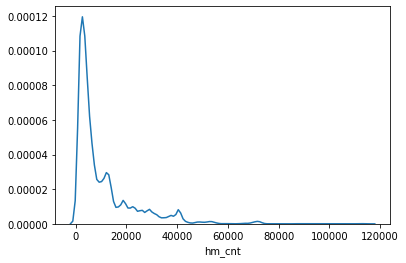

In [39]:
import seaborn as sns

sns.distplot(data.hm_cnt, hist = False)

### 2) 도시 vs 시골 

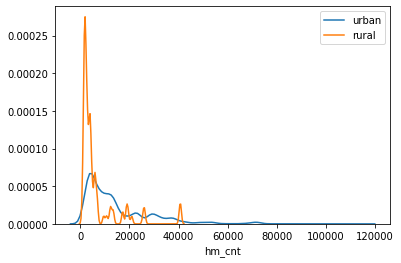

In [66]:
urban = data[data['urban_rural'] == 'urban']
rural = data[data['urban_rural'] == 'rural']

sns. distplot(urban['hm_cnt'], hist = False, label = 'urban')
sns. distplot(rural['hm_cnt'], hist = False, label = 'rural')

## 119 안전 센터와의 거리

### 1) train data

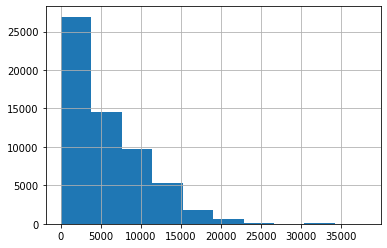

In [9]:
data.fr_sttn_dstnc.hist()

### 2) 도시

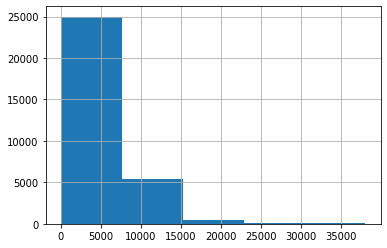

In [12]:
cctv_dstnc

### 3) 시골

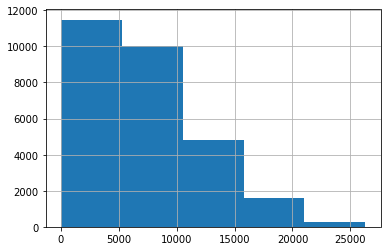

In [13]:
rural.fr_sttn_dstnc.hist(bins = 5)

## 소방용수시설과의 최소 거리

### 1) train data

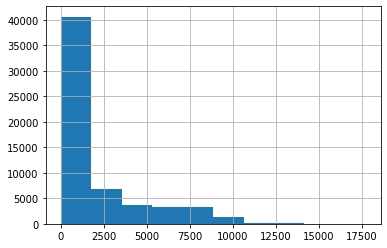

In [21]:
data.fr_wthr_fclt_dstnc.hist()

### 2) 도시

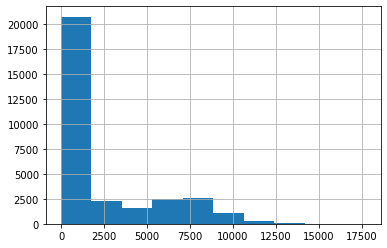

In [72]:
urban.fr_wthr_fclt_dstnc.hist()

### 3) 시골

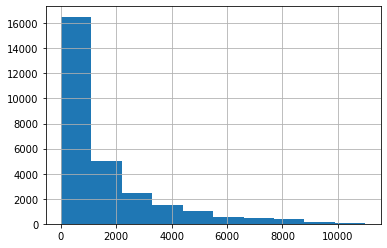

In [26]:
rural.fr_wthr_fclt_dstnc.hist()

## 관할 소방서 인원

### 1) train data

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


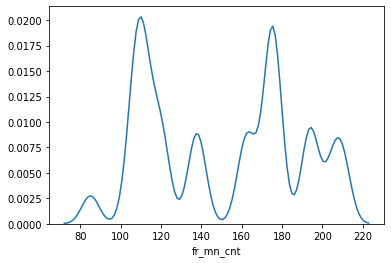

In [28]:
sns.distplot(train.fr_mn_cnt, hist = False)

### 2) 도시 vs 시골 

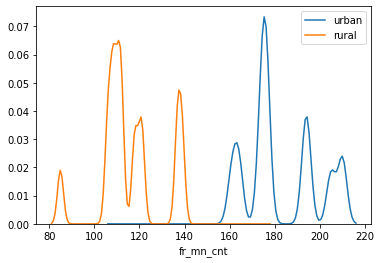

In [67]:
urban = data[data['urban_rural'] == 'urban']
rural = data[data['urban_rural'] == 'rural']

sns. distplot(urban['fr_mn_cnt'], hist = False, label = 'urban')
sns. distplot(rural['fr_mn_cnt'], hist = False, label = 'rural')

## 공공 CCTV와의 최소 거리

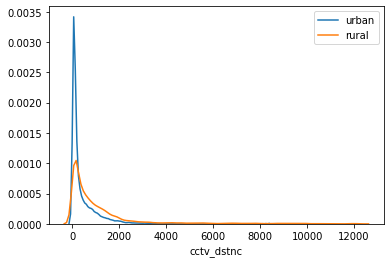

In [69]:
urban = data[data['urban_rural'] == 'urban']
rural = data[data['urban_rural'] == 'rural']

sns. distplot(urban['cctv_dstnc'], hist = False, label = 'urban')
sns. distplot(rural['cctv_dstnc'], hist = False, label = 'rural')

## 반경 100m 이내 공공 CCTV

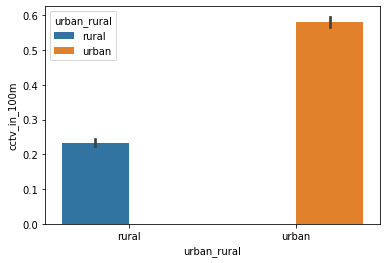

In [80]:
sns.barplot(data=data, x ='urban_rural', y='cctv_in_100m', hue = "urban_rural")

## 반경 100m 이내 소방용수 시설 수

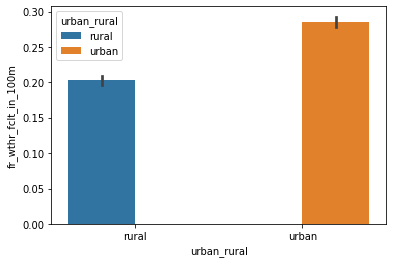

In [81]:
sns.barplot(data=data, x ='urban_rural', y='fr_wthr_fclt_in_100m', hue = "urban_rural")

## 반경 50m 이내의 건물 수

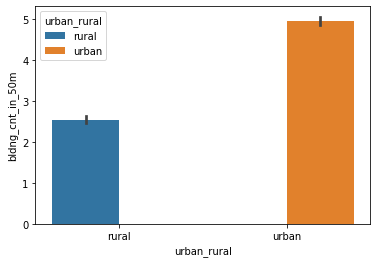

In [82]:
sns.barplot(data=data, x ='urban_rural', y='bldng_cnt_in_50m', hue = "urban_rural")